# Data analysis

## Load data

In [1]:
import json
import os
import matplotlib.pyplot as plt
import numpy as np
from qiskit_experiments.framework import (
    ExperimentData,
    ExperimentDecoder,
    ExperimentEncoder,
)
from qiskit_research.mzm_generation import KitaevHamiltonianAnalysis

In [2]:
# use this cell to retrieve data from the Qiskit Experiments database service

# from qiskit import IBMQ
# IBMQ.load_account()
# provider = IBMQ.get_provider(hub="ibm-q-internal", group="deployed", project="default")

# db_experiment_id = '960a6482-1a98-4509-96d3-2c46ac35b733'

# # retrieve data
# data = ExperimentData.load(db_experiment_id, provider.service("experiment"))

# # save data to local disk
# params = data.metadata["params"]
# filename = f"data/{params.filename}.json"
# os.makedirs(os.path.dirname(filename), exist_ok=True)
# with open(filename, "w") as f:
#     json.dump(data, f, cls=ExperimentEncoder)

# print(params.filename)

In [2]:
# load data from local disk

filenames = [
    # "2022-06-07T14:21:27.732642_ibmq_guadalupe_n6",
    # "2022-06-08T13:48:47.226726_ibmq_guadalupe_n8",
    # "2022-06-08T09:03:02.452130_ibmq_guadalupe_n10",
    "2022-06-08T19:28:08.685402_ibmq_guadalupe_n12",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""
# data = []
data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [14]:
filename = "2022-06-08T19:28:08.685402_ibmq_guadalupe_n12"

basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"

with open(os.path.join(basedir, "data/ibmq_guadalupe", f"{filename}.json")) as f:
    # this may raise an error from Qiskit Experiments but it should be safe to ignore
    data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [3]:
print(data.metadata['params'].filename)

NameError: name 'data' is not defined

In [3]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)

/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py:113: UserWarning: The default value for `display_format` will be changed from 'dense' to 'sparse' in version 0.3.0. Once that happens, you must specify display_format='dense' directly.
  return FermionicOp(f"-_{index}") + FermionicOp(f"+_{index}")
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


CPU times: user 6h 49min 53s, sys: 2min 38s, total: 6h 52min 31s
Wall time: 2h 13min 41s


In [15]:
data = analysis.run(data_raw[-1], replace_results=True)
data.block_for_results()
data_list.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)


In [16]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Guadalupe_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

[KitaevHamiltonianExperimentParameters(timestamp='2022-06-07T14:21:27.732642', backend_name='ibmq_guadalupe', qubits=[15, 12, 13, 14, 11, 8], n_modes=6, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5), (0,), (1, 2, 3, 4, 5), (1,), (0, 2, 3, 4, 5)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'], num_dd_passes=1, uhrig_spacing=False, concat_layers=1, pulse_scaling=False, num_twirled_circuits=0, seed=11364, basedir=None), KitaevHamiltonianExperimentParameters(timestamp='2022-06-08T13:48:47.226726', backend_name='ibmq_guadalupe', qubits=[3, 5, 8, 11, 14, 13, 12, 15], n_modes=8, tunneling_values=[-1.0], superconducting_values=[1.0], chemical_potential_values=[0.0, 0.75, 1.5, 2.25, 3.0], occupied_orbitals_list=[(), (0, 1, 2, 3, 4, 5, 6, 7), (0,), (1, 2, 3, 4, 5, 6, 7), (1,), (0, 2, 3, 4, 5, 6, 7)], dynamical_decoupling_sequences=[None, 'X2pm', 'XY4pm', 'XY8pm'], num_

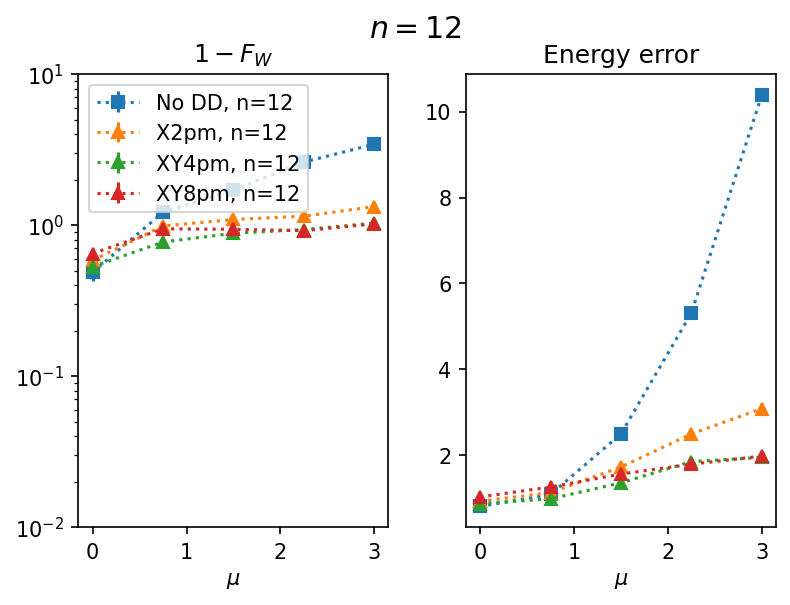

In [18]:
dd_sequences = ["X2pm", 'XY4pm', 'XY8pm']
fig, (ax1, ax2) = plt.subplots(1, 2, dpi=dpi)
fig.subplots_adjust(wspace=0.25)

i=3

values, stddev = fidelity_witness_avg[i][None]["pur"]
ax1.errorbar(
    params[i].chemical_potential_values,
    1 - values,
    yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params[i].n_modes}",
)

for dd_sequence in dd_sequences:
    values, stddev = fidelity_witness_avg[i][dd_sequence]["pur"]
    ax1.errorbar(
        params[i].chemical_potential_values,
        1 - values,
        yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

values, stddev, percent_error = energy_error[i][None]["pur"]
ax2.errorbar(
    params[i].chemical_potential_values,
    values,
    # percent_error * 100,
    # yerr=2 * stddev,
    fmt="s:",
    label=f"No DD, n={params[i].n_modes}",
)

ax1.set_xlabel(r"$\mu$")
ax1.set_title(r"$1 - F_W$")
ax1.set_yscale("log")
ax1.set_ylim(1e-2, 10)

for dd_sequence in dd_sequences:
    values, stddev, percent_error = energy_error[i][dd_sequence]["pur"]
    ax2.errorbar(
        params[i].chemical_potential_values,
        values,
        # percent_error * 100,
        # yerr=2 * stddev,
        fmt="^:",
        label=f"{dd_sequence}, n={params[i].n_modes}",
    )

ax2.set_xlabel(r"$\mu$")
ax2.set_title(r"Energy error")
# ax2.set_yscale("log")
# ax2.set_ylim(0, 1)
ax1.legend(loc="upper left")
fig.suptitle(
    rf"$n = {params[i].n_modes}$",
    size="x-large",
    # y=0.02
)

data.add_figures(fig, "fidelity_witness_dd", overwrite=True)
plt.savefig(f"{PLOT_DIR}/fidelity_witness_dd_compare_n{params[i].n_modes}.{filetype}")
plt.show()

## Make plots

In [11]:
# load data from local disk

filenames = [
    "2022-06-06T14:36:55.135537_ibmq_guadalupe_n9",
]

# directory with test data, edit this as appropriate
basedir = "/Users/georgezhou/Documents/GitHub/qiskit-research/docs/mzm_generation"
# basedir = ""
data = []
data_raw = []
for file in filenames:
    with open(os.path.join(basedir, "data", f"{file}.json")) as f:
        # this may raise an error from Qiskit Experiments but it should be safe to ignore
        data_raw.append(json.load(f, cls=ExperimentDecoder))

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit.providers.ibmq.accountprovider.AccountProvider'> from settings {}. 
The following exception was raised:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py", line 338, in _deserialize_object
    return cls(**settings)
TypeError: __init__() missing 2 required positional arguments: 'credentials' and 'factory'

  return _deserialize_object(obj_val)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/json.py:584: UserWarning: Could not deserialize instance of class <class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'> from value ExperimentConfig(cls=<class 'qiskit_research.mzm_generation.experiment.KitaevHamiltonianExperiment'>, args=[{

In [12]:
%%time
# run analysis
analysis = KitaevHamiltonianAnalysis()
data_list = []
for experiment_data in data_raw:
    data = analysis.run(experiment_data, replace_results=True)
    data.block_for_results()
    data_list.append(data)

/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: divide by zero encountered in det
  r = _umath_linalg.det(a, signature=signature)
/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/numpy/linalg/linalg.py:2146: RuntimeWarning: invalid value encountered in det
  r = _umath_linalg.det(a, signature=signature)
Analysis callback failed [Experiment ID: 6f8d4ab8-c64e-4ef1-b603-aaed1ddc7158][Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]:
Traceback (most recent call last):
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/database_service/db_experiment_data.py", line 535, in _run_analysis_callback
    callback(self, **kwargs)
  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/base_analysis.py", line 157, in run_analysis
    results, figures = analysis._run_analysis(expdata)
  File "/Users

CPU times: user 10min 31s, sys: 16.2 s, total: 10min 47s
Wall time: 6min 3s


In [13]:
params = []
fidelity_witness_avg = []
energy_exact = []
energy = []
energy_error = []
bdg_energy_exact = []
bdg_energy = []
edge_correlation_exact = []
edge_correlation = []
number_exact = []
number = []
parity_exact = []
parity = []
site_correlation_exact = []
site_correlation = []
for data in data_list:
    params.append(data.metadata["params"])

# load results
    fidelity_witness_avg.append(data.analysis_results("fidelity_witness_avg").value)
    energy_exact.append(data.analysis_results("energy_exact").value)
    energy.append(data.analysis_results("energy").value)
    energy_error.append(data.analysis_results("energy_error").value)
    bdg_energy_exact.append(data.analysis_results("bdg_energy_exact").value)
    bdg_energy.append(data.analysis_results("bdg_energy").value)
    edge_correlation_exact.append(data.analysis_results("edge_correlation_exact").value)
    edge_correlation.append(data.analysis_results("edge_correlation").value)
    number_exact.append(data.analysis_results("number_exact").value)
    number.append(data.analysis_results("number").value)
    parity_exact.append(data.analysis_results("parity_exact").value)
    parity.append(data.analysis_results("parity").value)
    site_correlation_exact.append(data.analysis_results("site_correlation_exact").value)
    site_correlation.append(data.analysis_results("site_correlation").value)

# create plot directory
PLOT_DIR = f"plots/Uhrig_n_experiment"
os.makedirs(PLOT_DIR, exist_ok=True)

# set plot options
dpi = 150
filetype = "pdf"

print(params)

DbExperimentEntryNotFound: 'Analysis result fidelity_witness_avg not found.\nErrors: \n[Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]: Analysis callback failed [Experiment ID: 6f8d4ab8-c64e-4ef1-b603-aaed1ddc7158][Analysis Callback ID: efa5a528008343a09c26a0c7414910cc]:\nTraceback (most recent call last):\n  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/database_service/db_experiment_data.py", line 535, in _run_analysis_callback\n    callback(self, **kwargs)\n  File "/Users/georgezhou/miniforge3/envs/DDResearch/lib/python3.9/site-packages/qiskit_experiments/framework/base_analysis.py", line 157, in run_analysis\n    results, figures = analysis._run_analysis(expdata)\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/analysis.py", line 113, in _run_analysis\n    results = list(self._compute_analysis_results(experiment_params, data, mit))\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/analysis.py", line 274, in _compute_analysis_results\n    ] = compute_correlation_matrix(quasis_raw)\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py", line 477, in compute_correlation_matrix\n    tunneling_plus, tunneling_plus_cov = compute_interaction_matrix(\n  File "/Users/georgezhou/Documents/GitHub/qiskit-research/qiskit_research/mzm_generation/utils.py", line 568, in compute_interaction_matrix\n    even_quasis = quasis[permutation, f"{label}_even"]\nKeyError: ((3, 5, 1, 7, 0, 8, 2, 6, 4), \'tunneling_plus_even\')\n'

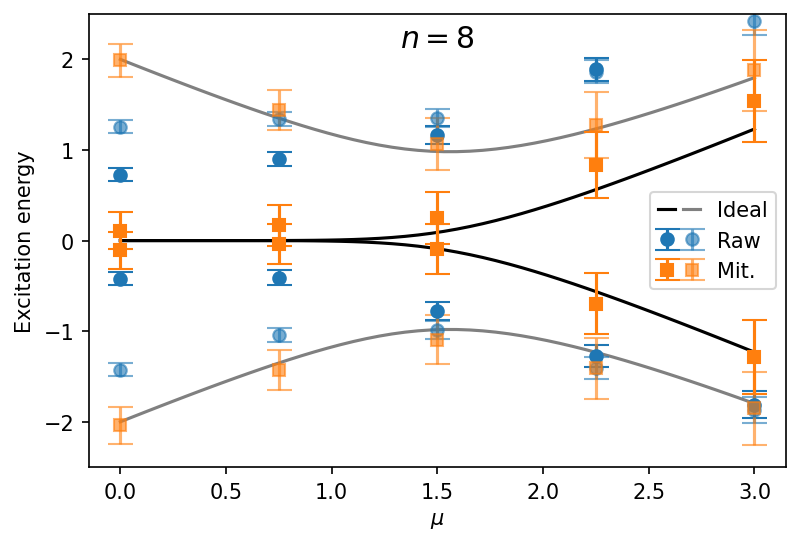

In [69]:
# plot BdG energies
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

ideal_lines = []
for i, energies in enumerate(bdg_energy_exact[0]):
    color = "gray" if i % 2 else "black"
    ideal_lines.append(
        ax.plot(
            bdg_energy_exact[1], energies, color=color, label=None if i else "Ideal"
        )
    )

threshold = len(bdg_energy[dd_sequence]["raw"][0]) // 2
raw_values, raw_stddev = bdg_energy[dd_sequence]["raw"]
mit_values, mit_stddev = bdg_energy[dd_sequence]["pur"]

raw_lines = []
mit_lines = []
for i in range(threshold):
    alpha = 1.0 if i == 0 else 0.6
    raw1 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[i],
        yerr=2 * raw_stddev[i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
        label=None if i else "Raw",
    )
    raw2 = ax.errorbar(
        params.chemical_potential_values,
        raw_values[threshold + i],
        yerr=2 * raw_stddev[threshold + i],
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=alpha,
    )
    mit1 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[i],
        yerr=2 * mit_stddev[i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
        label=None if i else "Mit.",
    )
    mit2 = ax.errorbar(
        params.chemical_potential_values,
        mit_values[threshold + i],
        yerr=2 * mit_stddev[threshold + i],
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=alpha,
    )
    raw_lines.append(raw1)
    raw_lines.append(raw2)
    mit_lines.append(mit1)
    mit_lines.append(mit2)
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"Excitation energy")
ax.set_ylim(-2.5, 2.5)

from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

(p1,) = ideal_lines[0]
(p2,) = ideal_lines[1]
q1 = raw_lines[0]
q2 = raw_lines[2]
r1 = mit_lines[0]
r2 = mit_lines[2]
ax.legend(
    [(p1, p2), (q1, q2), (r1, r2)],
    ["Ideal", "Raw", "Mit."],
    numpoints=1,
    handler_map={tuple: HandlerTuple(ndivide=None)},
)
# ax.legend(loc="center right")

ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)

data.add_figures(fig, "bdg_energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/bdg_energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")

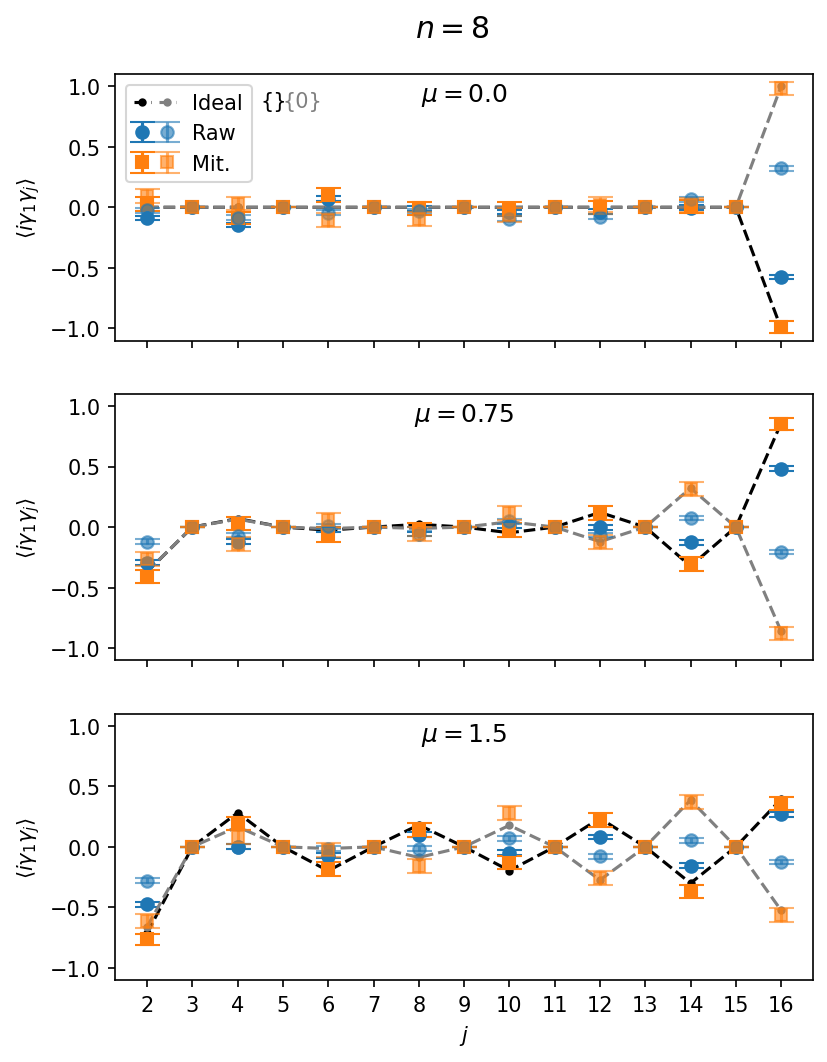

In [70]:
### plot site correlation
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

xvals = range(2, 2 * params.n_modes + 1)

chemical_potentials_to_plot = params.chemical_potential_values[:3]
# chemical_potentials_to_plot = params.chemical_potential_values
occupied_orbitals_to_plot = params.occupied_orbitals_list[0:3:2]
# occupied_orbitals_to_plot = params.occupied_orbitals_list[2:4]

fig, axes = plt.subplots(len(chemical_potentials_to_plot), 1, dpi=dpi, figsize=(6, 8))
# fig.subplots_adjust(hspace=0.7)

ideal_lines = []
raw_lines = []
mit_lines = []
for index, (ax, chemical_potential) in enumerate(
    zip(axes, chemical_potentials_to_plot)
):
    for i, occupied_orbitals in enumerate(occupied_orbitals_to_plot):
        alpha = 1.0 if i == 0 else 0.6
        # this_parity = int(parity_exact[occupied_orbitals][0][index])
        ideal_color = "black" if i == 0 else "gray"
        ideal_text = str(list(occupied_orbitals)).replace("[", "{").replace("]", "}")
        if index == 0:
            ax.text(4.5 + i * 0.5, 0.83, ideal_text, color=ideal_color)
        site_correlations = site_correlation_exact[
            chemical_potential, occupied_orbitals
        ]
        ideal_lines.append(
            ax.plot(
                xvals,
                site_correlations,
                ".--",
                color=ideal_color,
                label="Ideal" if not occupied_orbitals else None,
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["raw"][
            chemical_potential, occupied_orbitals
        ]
        raw_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="o",
                capsize=capsize,
                color=colors[0],
                alpha=alpha,
                label=None if i else "Raw",
            )
        )
        (vals, stddevs) = site_correlation[dd_sequence]["pur"][
            chemical_potential, occupied_orbitals
        ]
        mit_lines.append(
            ax.errorbar(
                xvals,
                vals,
                yerr=2 * np.array(stddevs),
                fmt="s",
                capsize=capsize,
                color=colors[1],
                alpha=alpha,
                label=None if i else "Mit.",
            )
        )
        ax.set_ylim(-1.1, 1.1)
    ax.set_ylabel(r"$\langle i \gamma_1 \gamma_j \rangle$")
    ax.set_xticks(xvals)
    if index == 0:
        from matplotlib.legend_handler import HandlerLine2D, HandlerTuple

        (p1,) = ideal_lines[0]
        (p2,) = ideal_lines[1]
        q1 = raw_lines[0]
        q2 = raw_lines[1]
        r1 = mit_lines[0]
        r2 = mit_lines[1]
        ax.legend(
            [(p1, p2), (q1, q2), (r1, r2)],
            ["Ideal", "Raw", "Mit."],
            numpoints=1,
            handler_map={tuple: HandlerTuple(ndivide=None)},
            loc="upper left",
        )
        # ax.legend(loc='lower left')
    if index == len(axes) - 1:
        ax.set_xlabel(r"$j$")
    else:
        ax.tick_params(axis="x", labelbottom=False)

    ax.set_title(rf"$\mu={chemical_potential}$", y=0.85)

fig.suptitle(rf"$n = {params.n_modes}$", size="x-large", y=0.93)
data.add_figures(fig, f"site_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/site_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()

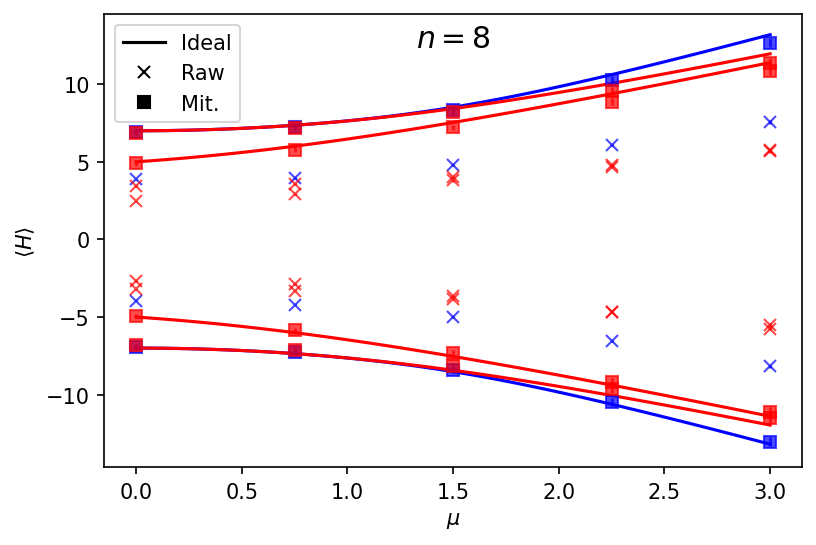

In [71]:
# plot energy
fig, ax = plt.subplots(dpi=dpi)

for occupied_orbitals, (energies, xvals) in energy_exact.items():
    ax.plot(
        xvals,
        energies,
        # label = "Ideal" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="x",
        # label="Raw" if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
for occupied_orbitals, (energies, stddevs) in energy[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        energies,
        yerr=2 * np.array(stddevs),
        fmt="s",
        # label = "Mit." if not i else None,
        color="red" if len(occupied_orbitals) % 2 else "blue",
        alpha=0.7,
    )
ax.plot([], [], label="Ideal", color="black")
ax.errorbar([], [], fmt="x", label="Raw", color="black")
ax.errorbar([], [], fmt="s", label="Mit.", color="black")
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle H \rangle$")
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.90)
ax.legend()

data.add_figures(fig, "energy", overwrite=True)
plt.savefig(f"{PLOT_DIR}/energy_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

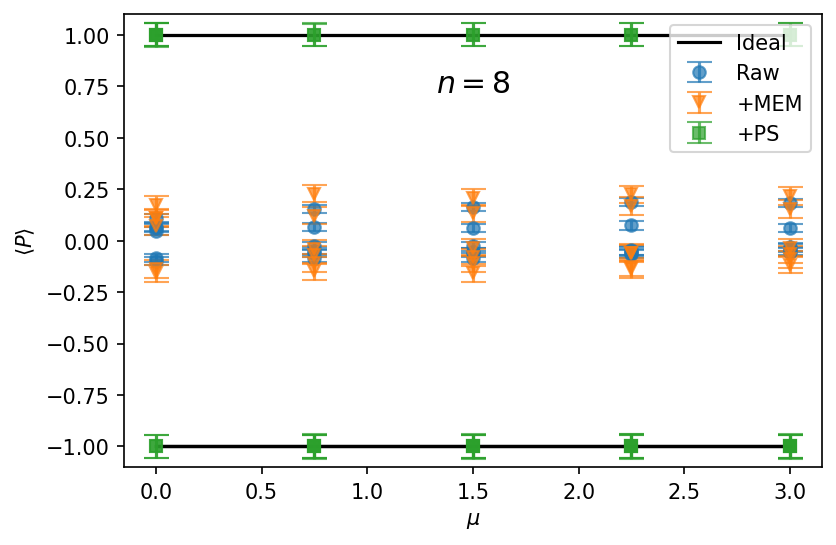

In [72]:
# plot parity
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (parities, xvals) in parity_exact.items():
    ax.plot(
        xvals, parities, label="Ideal" if not occupied_orbitals else None, color="black"
    )

for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["raw"].items():
    label = "Raw" if not occupied_orbitals else None
    color = "red" if len(occupied_orbitals) % 2 else "blue"
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["mem"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="v",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="+MEM" if not occupied_orbitals else None,
    )
for occupied_orbitals, (parities, stddevs) in parity[dd_sequence]["ps"].items():
    ax.errorbar(
        params.chemical_potential_values,
        parities,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[2],
        alpha=0.7,
        label="+PS" if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle P \rangle$")
ax.set_ylim(-1.1, 1.1)
ax.legend()
ax.set_title(rf"$n = {params.n_modes}$", size="x-large", y=0.80)

data.add_figures(fig, "parity", overwrite=True)
plt.savefig(f"{PLOT_DIR}/parity_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

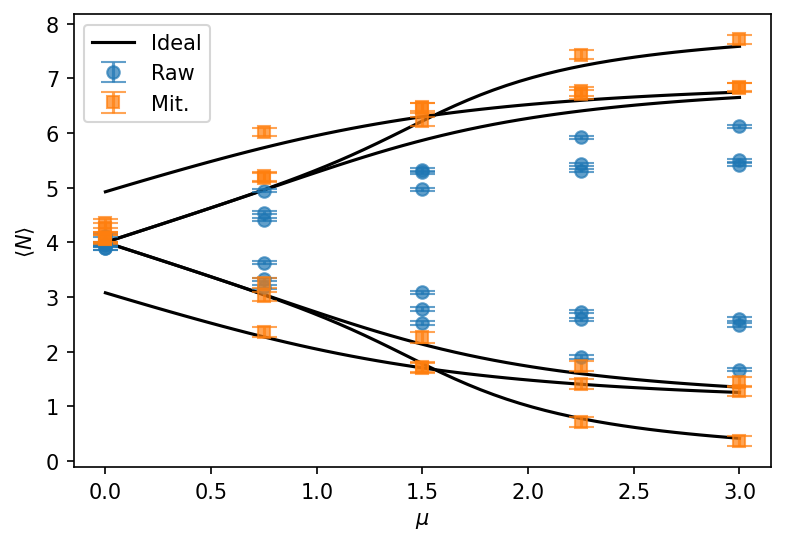

In [73]:
# plot number
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (numbers, xvals) in number_exact.items():
    ax.plot(
        xvals,
        numbers,
        label="Ideal" if not occupied_orbitals else None,
        color="black",
    )

for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["raw"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (numbers, stddevs) in number[dd_sequence]["pur"].items():
    ax.errorbar(
        params.chemical_potential_values,
        numbers,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle N \rangle$")
ax.legend()

data.add_figures(fig, "number", overwrite=True)
plt.savefig(f"{PLOT_DIR}/number_dd-{dd_sequence}_n{params.n_modes}.{filetype}")
plt.show()

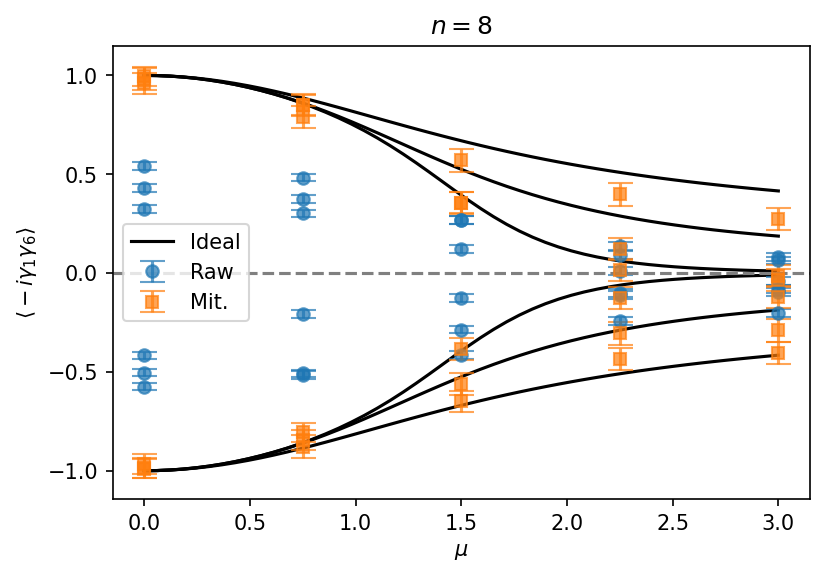

In [74]:
# plot edge correlation
fig, ax = plt.subplots(dpi=dpi)
prop_cycle = plt.rcParams["axes.prop_cycle"]
colors = prop_cycle.by_key()["color"]
capsize = 6

for occupied_orbitals, (values, xvals) in edge_correlation_exact.items():
    ax.plot(
        xvals,
        values,
        color="black",
        label="Ideal" if not occupied_orbitals else None,
    )

for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "raw"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="o",
        capsize=capsize,
        color=colors[0],
        alpha=0.7,
        label="Raw" if not occupied_orbitals else None,
    )
for occupied_orbitals, (values, stddevs) in edge_correlation[dd_sequence][
    "pur"
].items():
    ax.errorbar(
        params.chemical_potential_values,
        values,
        yerr=2 * np.array(stddevs),
        fmt="s",
        capsize=capsize,
        color=colors[1],
        alpha=0.7,
        label="Mit." if not occupied_orbitals else None,
    )
ax.set_xlabel(r"$\mu$")
ax.set_ylabel(r"$\langle -i \gamma_1 \gamma_6 \rangle$")
ax.axhline([0], color="gray", linestyle="--")
ax.legend(loc="center left")
ax.set_title(rf"$n = {params.n_modes}$")

data.add_figures(fig, "edge_correlation", overwrite=True)
plt.savefig(
    f"{PLOT_DIR}/edge_correlation_dd-{dd_sequence}_n{params.n_modes}.{filetype}"
)
plt.show()